In [1]:
%matplotlib inline
from zhu import *
import imp

In [5]:
imp.reload(zhu)
from zhu import *

2


TypeError: 'AxesSubplot' object does not support indexing

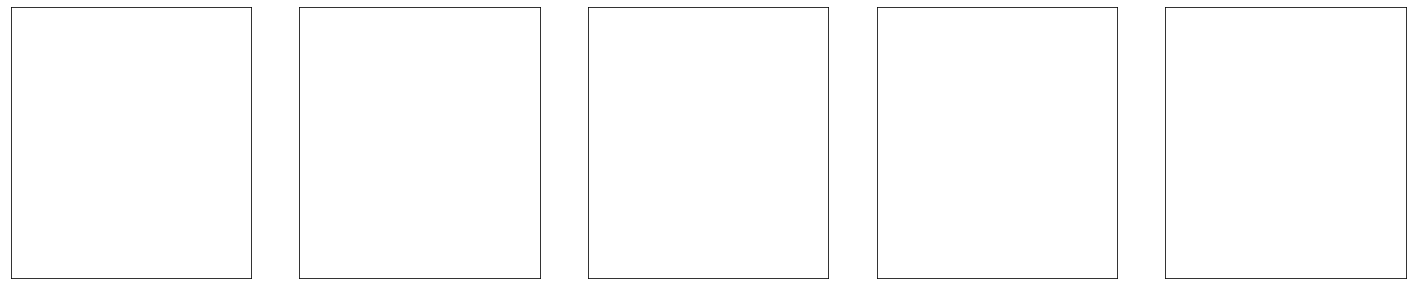

In [2]:
folder = 'to_visapp/many'
many_objects(2, 'data/'+folder,'data/'+folder+'_result', 'png')

20


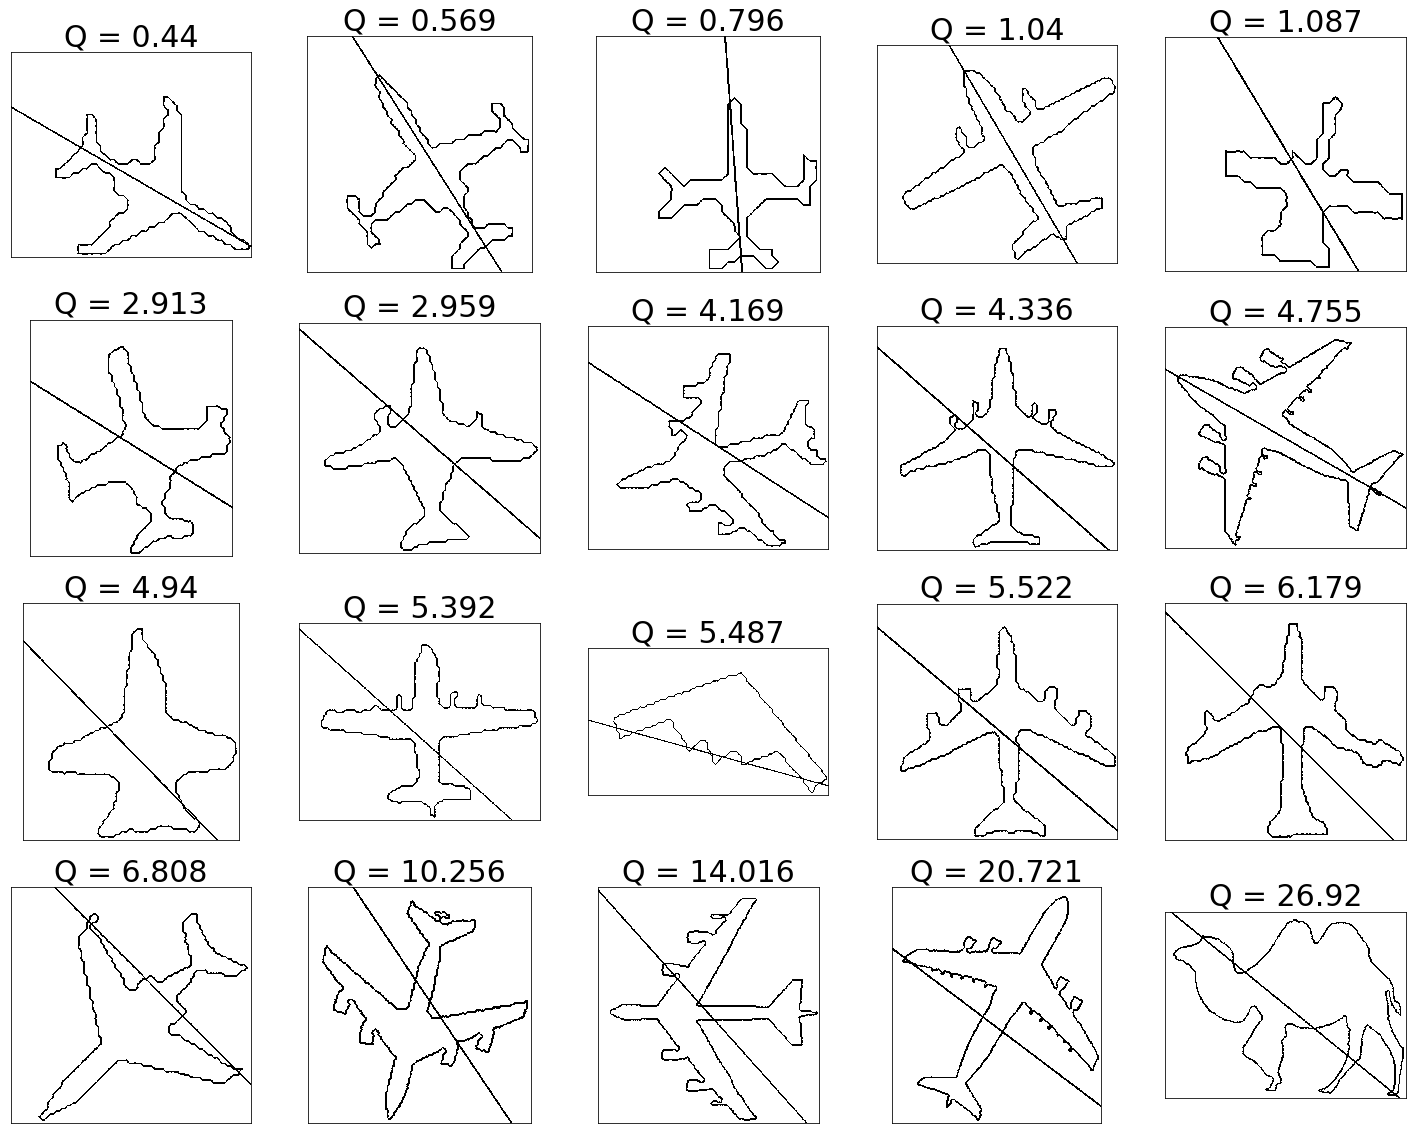

In [3]:
folder = 'to_visapp/planes'
many_objects(5, 'data/'+folder,'data/'+folder+'_result', 'png')

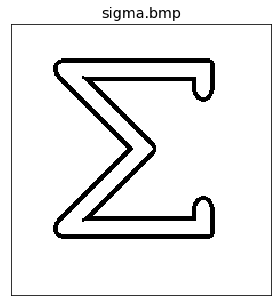

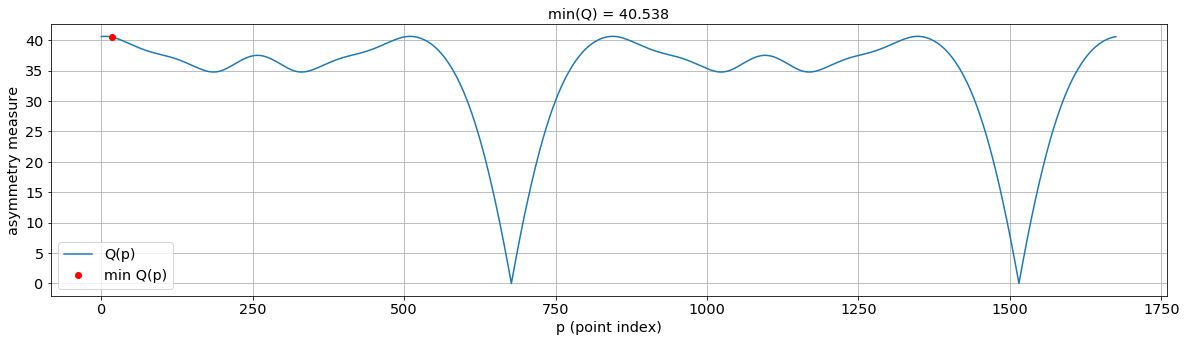

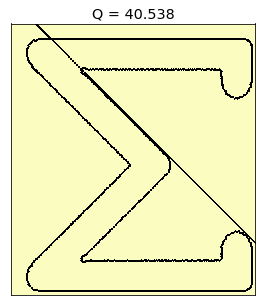

In [4]:
folder = 'to_visapp/by_one'
save_results('data/'+folder,'data/'+folder+'_result',False,'csv','png')

In [3]:
from zhu_draw import *
from zhu_contour import *
from zhu_symmetry import *
import numpy as np
from matplotlib import pyplot as plt

In [13]:
import imp
imp.reload(zhu_contour)
imp.reload(zhu_draw)
imp.reload(zhu_symmetry)
from zhu_draw import *
from zhu_contour import *
from zhu_symmetry import *

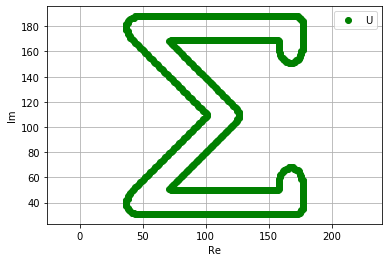

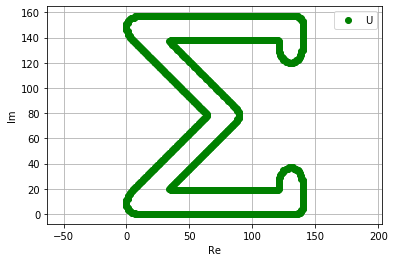

1668
[   1    2    3 ... 1665 1666 1667]


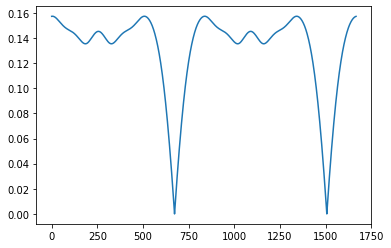

673 (125.49609547738821+122j)


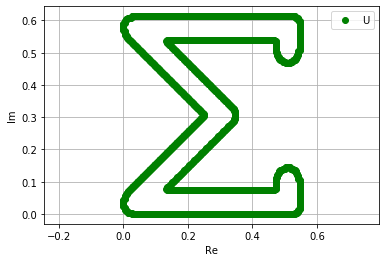

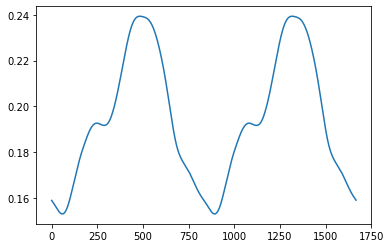

893 (41.49609547738822+129.5j)
0.15299037059701592 0.856372687700055


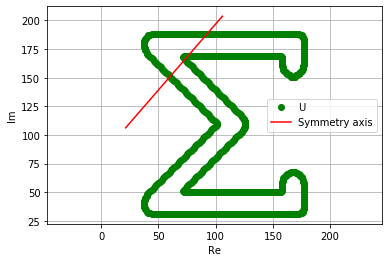

In [14]:
path = "data/truesym_examples/sigma.bmp"
u = get_contours(path)[0]
draw_contour('plt', u)
plt.show()
q, (p, v) = find_sym(u)
draw_contour('plt', u, p, v)

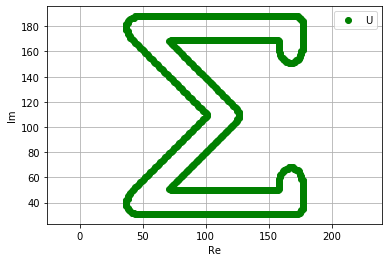

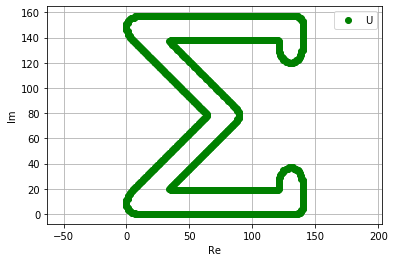

In [19]:
path = "data/truesym_examples/sigma.bmp"
u = get_contours(path)[0]
draw_contour('plt', u)
plt.show()
u1, vec, scale = preprocess(u)
draw_contour('plt', preprocess_inverse(u1, vec, scale))
plt.show()

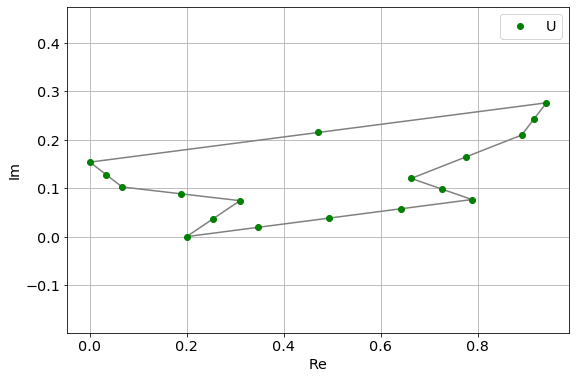

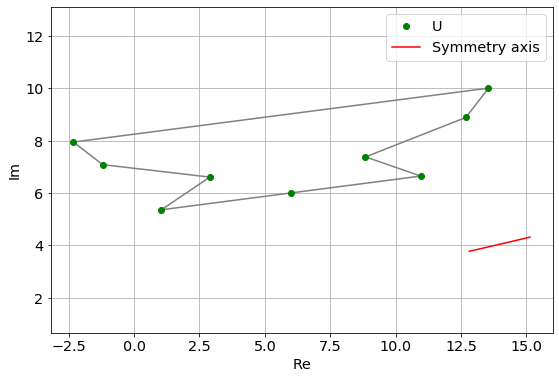

In [82]:
q, (p, v) = zhu_symmetry.find_sym(u)  
zhu_draw.contour('plt', u, p, v)

In [83]:
p

(2.873847144726672+1.4492447475454455j)

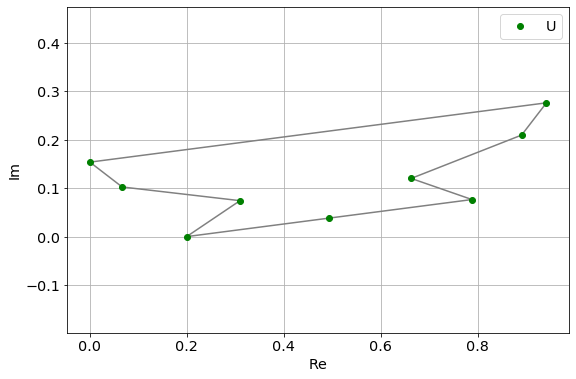

In [79]:
u_p, vec, scale = zhu_contour.preprocess(u, 0)
zhu_draw.contour('plt', u_p)
plt.show()

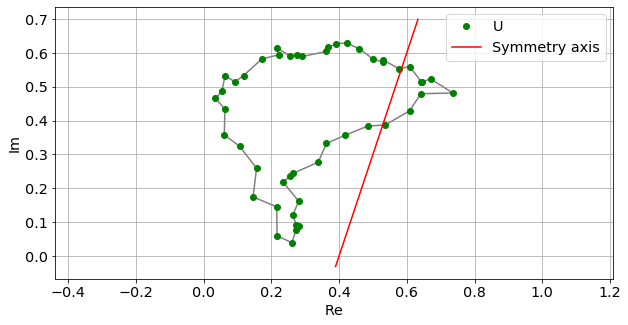

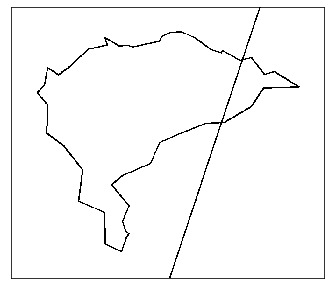

In [40]:
u = np.array([1+5j, 3+1j, 3+3j, 7+5j, 5+6j, 3+6j])
u_m, *_ = zhu_contour.preprocess(u,3)
u_m += (np.random.random(u_m.size)+1j*np.random.random(u_m.size))*0.05
#zhu_draw.prepare_scene()
zhu_draw.contour('plt', u_m, 0.6+0.6j, 1+3j)
plt.show()
zhu_draw.imshow_bw(zhu_draw.contour('cv2', u_m, 0.6+0.6j, 1+3j, line_w = 2))
plt.show()

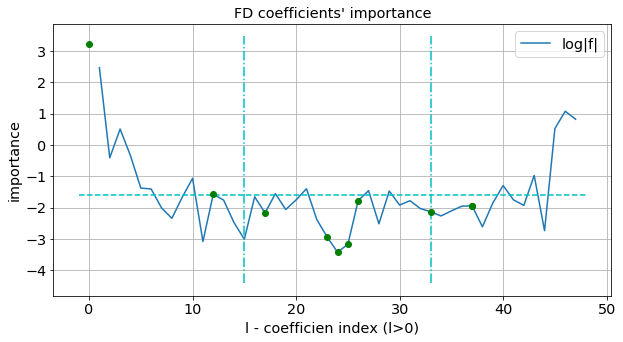

In [41]:
f = np.fft.fft(u_m)
zhu_draw.plot_f_abs(f, 0.2, 30, np.random.randint(0,40,10))

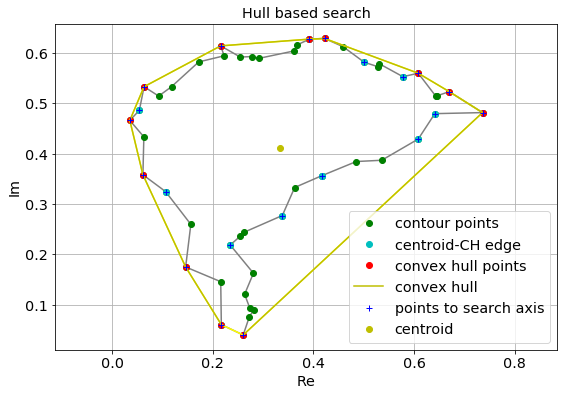

In [42]:
zhu_draw.prepare_scene()
by_hull, h_m, hull = zhu_symmetry.hull_based_index(u_m, 0)
zhu_draw.plot_hull(u_m, u_m[by_hull], u_m[h_m], u_m[hull])
plt.show()